In [1]:
import numpy as np
import pandas as pd

In [ ]:
1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [3]:
data_set = pd.read_csv('SalaryData_Train.csv')

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
occupation_set = set(data_set['occupation'])
print(occupation_set)

{' Adm-clerical', ' Exec-managerial', ' Armed-Forces', ' Transport-moving', ' Machine-op-inspct', ' Priv-house-serv', ' Farming-fishing', ' Other-service', ' Tech-support', ' Prof-specialty', ' Handlers-cleaners', ' Protective-serv', ' Craft-repair', ' Sales'}


In [8]:
data_set.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [32]:
data_set['occupation'].isnull().values.any()

False

In [31]:
occupation_set = set(data_set['occupation'])
print(occupation_set)

{' Adm-clerical', ' Exec-managerial', ' Armed-Forces', ' Transport-moving', ' Machine-op-inspct', ' Priv-house-serv', ' Farming-fishing', ' Other-service', ' Tech-support', ' Prof-specialty', ' Handlers-cleaners', ' Protective-serv', ' Craft-repair', ' Sales'}


In [13]:
occupation_set

{' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving'}

In [34]:
occupation = [' Adm-clerical', ' Exec-managerial', ' Armed-Forces', ' Transport-moving', ' Machine-op-inspct', ' Priv-house-serv', ' Farming-fishing', ' Other-service', ' Tech-support', ' Prof-specialty', ' Handlers-cleaners', ' Protective-serv', ' Craft-repair', ' Sales']

d = dict()
i = 0
for occupation in occupation:
    if occupation not in d:
        d[occupation] = i
        i += 1
print(d)
#print(sorted(d.items(), key=lambda kv: kv[1])) print them sorted

{' Adm-clerical': 0, ' Exec-managerial': 1, ' Armed-Forces': 2, ' Transport-moving': 3, ' Machine-op-inspct': 4, ' Priv-house-serv': 5, ' Farming-fishing': 6, ' Other-service': 7, ' Tech-support': 8, ' Prof-specialty': 9, ' Handlers-cleaners': 10, ' Protective-serv': 11, ' Craft-repair': 12, ' Sales': 13}


In [38]:
data_set['occupation'] = data_set['occupation'].map({' Adm-clerical': 0, ' Exec-managerial': 1, ' Armed-Forces': 2, ' Transport-moving': 3, ' Machine-op-inspct': 4, ' Priv-house-serv': 5, ' Farming-fishing': 6, ' Other-service': 7, ' Tech-support': 8, ' Prof-specialty': 9, ' Handlers-cleaners': 10, ' Protective-serv': 11, ' Craft-repair': 12, ' Sales': 13}).astype(int)

In [39]:
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,1,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,10,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,10,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
income_set = set(data_set['Salary'])
print(income_set)

{' <=50K', ' >50K'}


In [44]:
data_set['Salary'] = data_set['Salary'].map({' <=50K' : 0, ' >50K' : 1}).astype(int)

In [45]:
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,1,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,10,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,10,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0


In [46]:
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='education'>

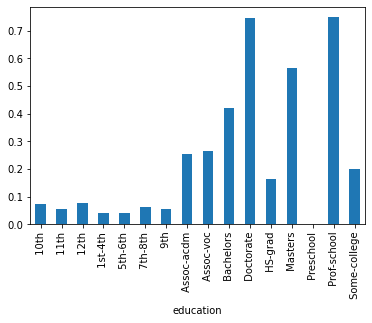

In [48]:
data_set.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

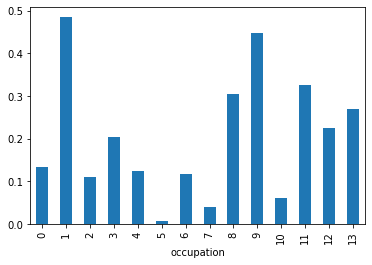

In [49]:
data_set.groupby('occupation').Salary.mean().plot(kind='bar')

In [51]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = data_set[['educationno', 'occupation']]

# Taking the labels (Income)
Y = data_set['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [52]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7768937510359688


In [54]:
# Taking only the features that is important for now
X = data_set[['educationno', 'age', 'hoursperweek', 'capitalgain']]

# Taking the labels (Income)
Y = data_set['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [55]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7957898226421349


<AxesSubplot:xlabel='race'>

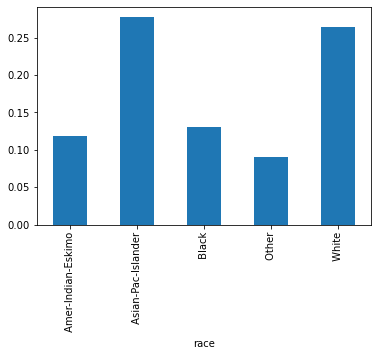

In [57]:
data_set.groupby('race').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

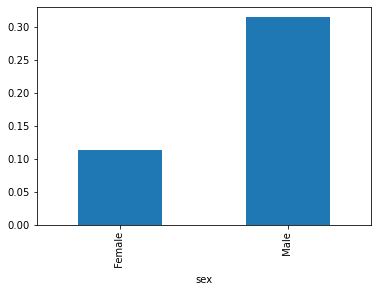

In [58]:
data_set.groupby('sex').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

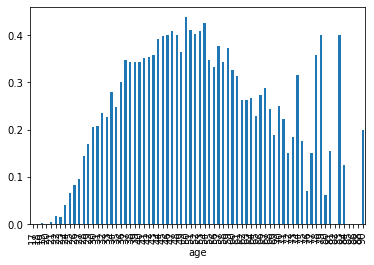

In [60]:
data_set.groupby('age').Salary.mean().plot(kind='bar')

In [ ]:
#Men have more chances to have a higher income
#white and Asian Pacific Islanders have more chances than other races
#Income sort of follows the normal deviation, with a peak at 50 years old

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)